In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [2]:
df = pd.read_csv("../data/data.csv")

In [3]:
published = df[df['soltype'] == "Published Confirmed"].sort_values(by='pl_name').drop_duplicates(subset='pl_name', keep='first')

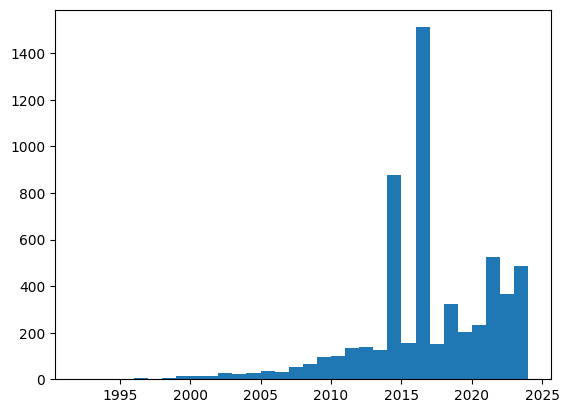

In [4]:
_ = plt.hist(published['disc_year'], bins=32)

In [5]:
disc_facility = published[['disc_facility', 'disc_year']]

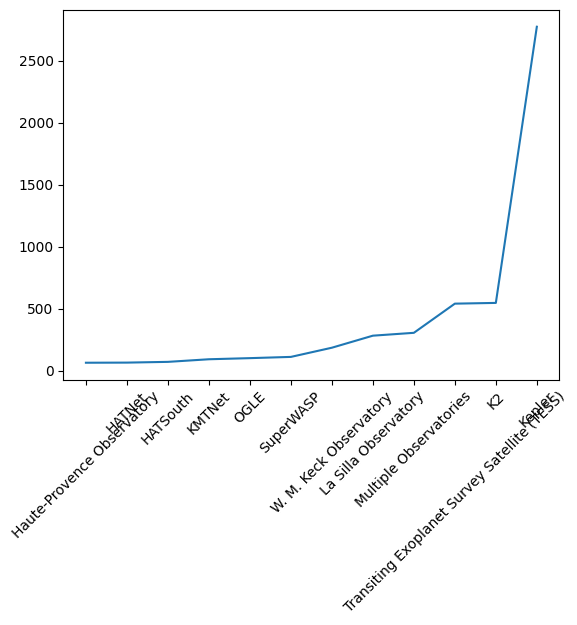

In [6]:
by_disc_facility = disc_facility.groupby(['disc_facility']).size().reset_index(name='cnt').sort_values(['cnt', 'disc_facility'])
by_disc_facility = by_disc_facility[by_disc_facility['cnt'] > 60]
plt.plot(by_disc_facility['disc_facility'], by_disc_facility['cnt'])
_ = plt.xticks(rotation=45)  # Set the angle of x-axis ticks to 45 degrees

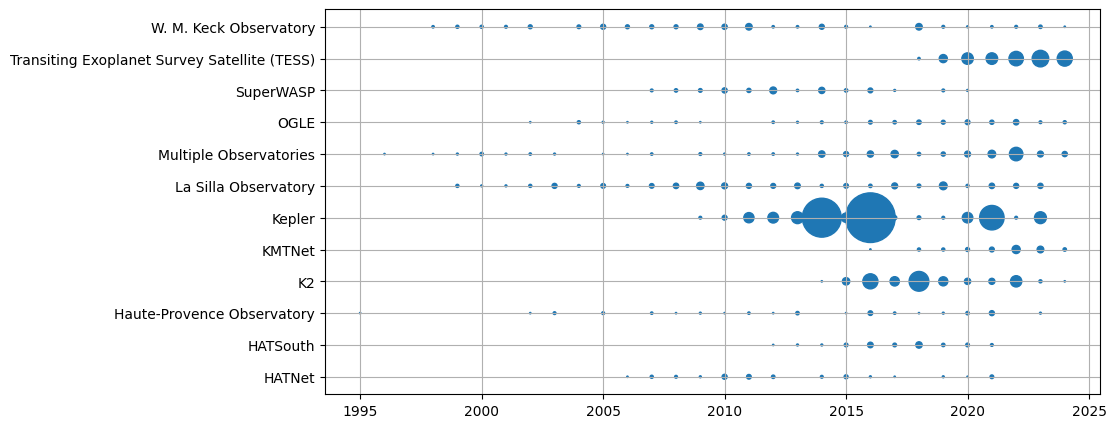

In [7]:
disc_facility_grouped = disc_facility.groupby(['disc_facility', 'disc_year']).size().reset_index(name='cnt')
big_disc_facility_year_grouped = disc_facility_grouped[(disc_facility_grouped['disc_facility'].isin(by_disc_facility['disc_facility']))]
plt.figure(figsize=(10, 5))  # 10 inches wide, 6 inches high

plt.scatter(big_disc_facility_year_grouped['disc_year'], big_disc_facility_year_grouped['disc_facility'], s=big_disc_facility_year_grouped['cnt'] )
plt.grid()

In [8]:
published.groupby(['discoverymethod']).size().reset_index(name='cnt').sort_values(['cnt'])

,discoverymethod,cnt
1,Disk Kinematics,1
7,Pulsation Timing Variations,2
0,Astrometry,3
6,Pulsar Timing,8
5,Orbital Brightness Modulation,9
2,Eclipse Timing Variations,17
10,Transit Timing Variations,29
3,Imaging,82
4,Microlensing,223
8,Radial Velocity,1092


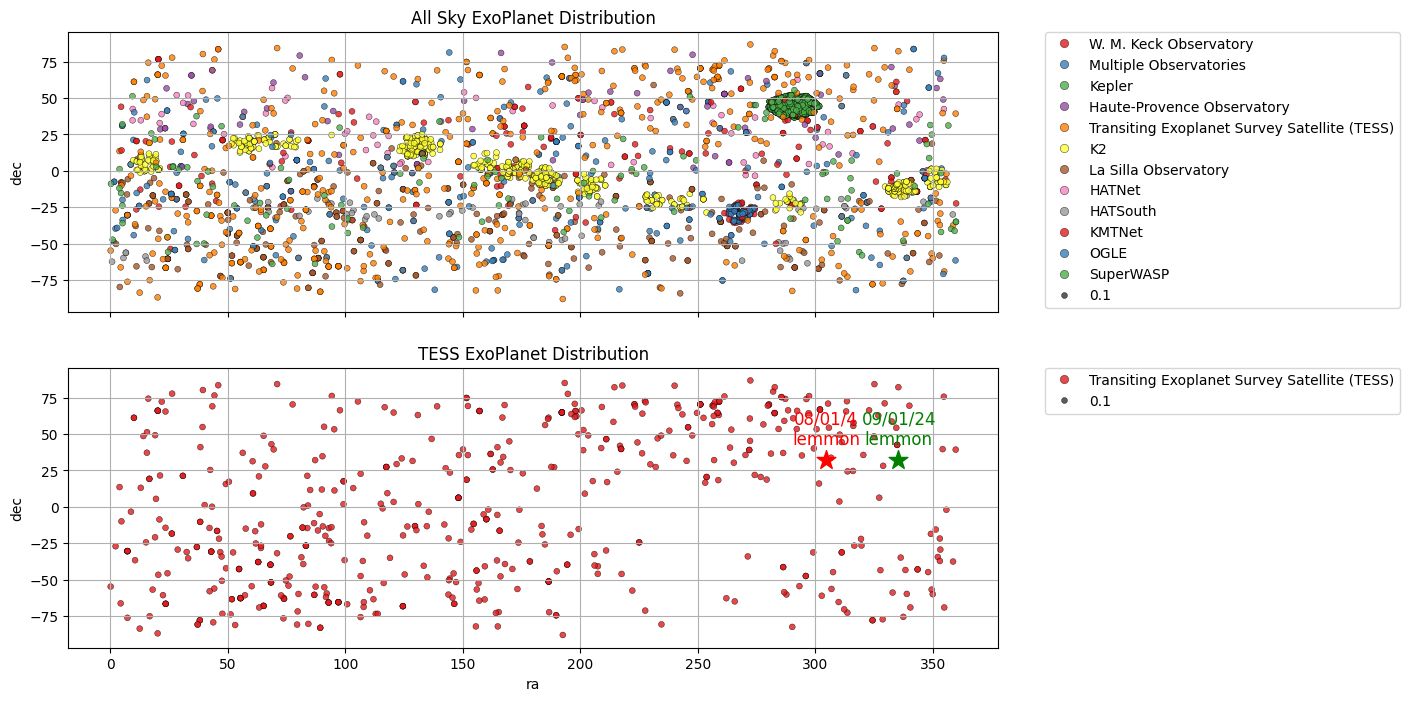

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)  # 2x2 grid of subplots
top_published = published[(published['disc_facility'].isin(by_disc_facility['disc_facility']))]
tess = published[(published['disc_facility']== 'Transiting Exoplanet Survey Satellite (TESS)')]

sns.scatterplot(ax=axes[0], data=top_published, x='ra', y='dec', hue='disc_facility', palette='Set1', edgecolor='k', size=0.1, alpha=.8, legend=True)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes[0].set_title("All Sky ExoPlanet Distribution")
axes[0].grid()
sns.scatterplot(ax=axes[1], data=tess, x='ra', y='dec', hue='disc_facility', palette='Set1', edgecolor='k', size=0.1, alpha=.8, legend=True)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
axes[1].set_title("TESS ExoPlanet Distribution")

axes[1].text(304.6, 40, '08/01/4\nlemmon', fontsize=12, ha='center', va='bottom', color='red')
axes[1].scatter(304.6, 32.44, color='red', marker='*', s=200)  # s is the size of the marker
axes[1].text(335.6, 40, '09/01/24\nlemmon', fontsize=12, ha='center', va='bottom', color='green')
axes[1].scatter(335.1, 32.44, color='green', marker='*', s=200)  # s is the size of the marker
axes[1].grid()

In [10]:
kepler_dense_patch = published[(published['ra'] > 275) & (published['ra'] < 305) & (published['dec'] > 37.5) & (published['dec'] < 52.5)]
kepler_dense_patch.groupby(['disc_facility']).size().reset_index(name='cnt').sort_values(['cnt', 'disc_facility'])

,disc_facility,cnt
0,Fred Lawrence Whipple Observatory,1
2,Haute-Provence Observatory,1
3,KOINet,1
6,Multiple Facilities,1
9,SuperWASP,1
10,TrES,1
11,Transiting Exoplanet Survey Satellite (TESS),1
5,McDonald Observatory,2
1,HATNet,3
8,Roque de los Muchachos Observatory,5


In [11]:
dense_patch = published[(published['ra'] > 262) & (published['ra'] < 273) & (published['dec'] > -35) & (published['dec'] < -20)]
dense_patch.groupby(['disc_facility']).size().reset_index(name='cnt').sort_values(['cnt', 'disc_facility'])

,disc_facility,cnt
1,K2,1
3,Las Campanas Observatory,1
5,Mauna Kea Observatory,1
6,Multiple Facilities,1
9,Transiting Exoplanet Survey Satellite (TESS),1
0,Hubble Space Telescope,2
7,Multiple Observatories,2
4,MOA,28
2,KMTNet,87
8,OGLE,93


In [12]:
dense_patch = published[(published['ra'] > 120) & (published['ra'] < 140) & (published['dec'] > 4) & (published['dec'] < 27)]
dense_patch.groupby(['disc_facility']).size().reset_index(name='cnt').sort_values(['cnt', 'disc_facility'])

,disc_facility,cnt
0,Bohyunsan Optical Astronomical Observatory,1
5,KELT,1
6,La Silla Observatory,1
7,McDonald Observatory,1
9,Roque de los Muchachos Observatory,1
10,SuperWASP,1
1,Fred Lawrence Whipple Observatory,2
3,Haute-Provence Observatory,2
2,HATNet,4
11,W. M. Keck Observatory,4


In [13]:
xlim = [40, 80]
ylim = [10, 30]
dense_patch = published[(published['ra'] > xlim[0]) & (published['ra'] < xlim[1]) & (published['dec'] > ylim[0]) & (published['dec'] < ylim[1])]
dense_patch.groupby(['disc_facility']).size().reset_index(name='cnt').sort_values(['cnt', 'disc_facility'])

,disc_facility,cnt
2,Fred Lawrence Whipple Observatory,1
4,Hubble Space Telescope,1
6,La Silla Observatory,1
8,Multiple Facilities,1
10,Okayama Astrophysical Observatory,1
11,Paranal Observatory,1
12,Spitzer Space Telescope,1
0,Calar Alto Observatory,2
1,European Space Agency (ESA) Gaia Satellite,2
3,HATNet,2
